# Import Python Libraries

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

# Creating Dataframes

In [2]:
data = pd.read_csv("data/listings_Sep_22.csv")

data.shape

/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_2413/680783725.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/listings_Sep_22.csv")


(39881, 75)

In [3]:
important_columns = [
    'id',
    # 'last_scraped',
    # 'name',
    # 'description',
    'host_location',
    'host_response_time',
    'host_response_rate',
    'host_neighbourhood',
    'neighbourhood_cleansed',
    'neighbourhood_group_cleansed',
    'latitude',
    'longitude',
    'property_type',
    'room_type',
    'accommodates',
    # 'bathrooms_text',
    'bedrooms',
    'beds',
    # 'amenities',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'instant_bookable',
    'price'
    ]
df = data[important_columns]

df.head()

,id,host_location,host_response_time,host_response_rate,host_neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,instant_bookable,price
0,2539,"New York, NY",within an hour,100%,Gravesend,Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,1.0,1.0,21,51,81,356,f,$299.00
1,2595,"New York, NY",within a day,75%,Midtown,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1.0,0,0,5,280,f,$175.00
2,5121,"New York, NY",within an hour,100%,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,1.0,5,30,60,335,f,$60.00
3,45910,"New York, NY",within an hour,100%,Ridgewood,Ridgewood,Queens,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,5.0,10.0,30,60,90,365,f,$425.00
4,5136,"New York, NY",NaN,NaN,Greenwood Heights,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,2.0,2.0,0,0,0,179,f,$275.00


In [4]:
#original datatypes 
df.dtypes

id                                int64
host_location                    object
host_response_time               object
host_response_rate               object
host_neighbourhood               object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bedrooms                        float64
beds                            float64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
instant_bookable                 object
price                            object
dtype: object

In [5]:
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.replace("%",''))
df['instant_bookable'] = np.where(df['instant_bookable'] == 't', True, False)
df['price'] = df['price'].str.replace("$","")
df['price'] = pd.to_numeric(df['price'].str.replace(",",""))

/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_2413/3731789118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.replace("%",''))
/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_2413/3731789118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['instant_bookable'] = np.where(df['instant_bookable'] == 't', True, False)
/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_2413/3731789118.py:3: FutureWarnin

In [6]:
#updated columnd datatypes 
df.dtypes

id                                int64
host_location                    object
host_response_time               object
host_response_rate              float64
host_neighbourhood               object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bedrooms                        float64
beds                            float64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
instant_bookable                   bool
price                           float64
dtype: object

In [7]:
#percentage of empty cells
df.isna().sum()/len(df)*100

id                               0.000000
host_location                   17.258845
host_response_time              33.971064
host_response_rate              33.971064
host_neighbourhood              20.638901
neighbourhood_cleansed           0.000000
neighbourhood_group_cleansed     0.000000
latitude                         0.000000
longitude                        0.000000
property_type                    0.000000
room_type                        0.000000
accommodates                     0.000000
bedrooms                         9.485720
beds                             2.216594
availability_30                  0.000000
availability_60                  0.000000
availability_90                  0.000000
availability_365                 0.000000
instant_bookable                 0.000000
price                            0.000000
dtype: float64

In [8]:
#percentage of missing data in features
df.isna().sum()/len(df)*100

id                               0.000000
host_location                   17.258845
host_response_time              33.971064
host_response_rate              33.971064
host_neighbourhood              20.638901
neighbourhood_cleansed           0.000000
neighbourhood_group_cleansed     0.000000
latitude                         0.000000
longitude                        0.000000
property_type                    0.000000
room_type                        0.000000
accommodates                     0.000000
bedrooms                         9.485720
beds                             2.216594
availability_30                  0.000000
availability_60                  0.000000
availability_90                  0.000000
availability_365                 0.000000
instant_bookable                 0.000000
price                            0.000000
dtype: float64

In [9]:
#percentage of duplicated rows
df.duplicated().sum()/len(df)*100

0.0

In [10]:
#create a new dataframe with no duplicates and empty cells
full_df = df.dropna().drop_duplicates().drop('id', axis=1).reset_index(drop=True)
full_df.head()

,host_location,host_response_time,host_response_rate,host_neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,instant_bookable,price
0,"New York, NY",within an hour,100.0,Gravesend,Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,1.0,1.0,21,51,81,356,False,299.0
1,"New York, NY",within an hour,100.0,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,1.0,5,30,60,335,False,60.0
2,"New York, NY",within an hour,100.0,Ridgewood,Ridgewood,Queens,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,5.0,10.0,30,60,90,365,False,425.0
3,"New York, United States",within an hour,99.0,Greenpoint,Greenpoint,Brooklyn,40.73777,-73.95366,Room in boutique hotel,Hotel room,2,1.0,1.0,15,42,72,217,False,308.0
4,"New York, NY",within a few hours,100.0,Hell's Kitchen,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,1.0,1.0,2,4,7,160,False,68.0


# EDA of Features

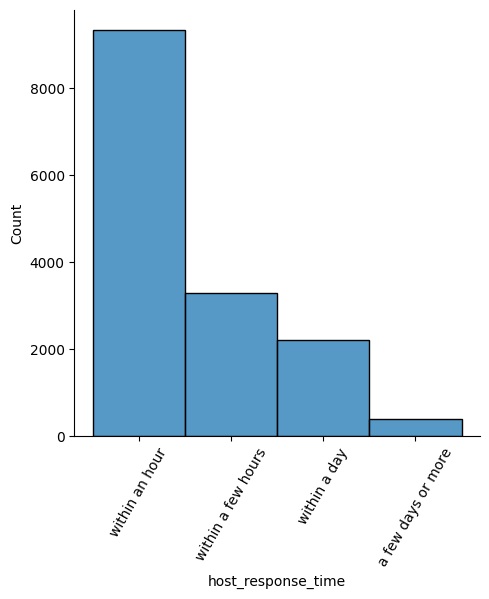

In [11]:
sns.displot(data=full_df, x='host_response_time')
plt.xticks(rotation=60)
plt.show()

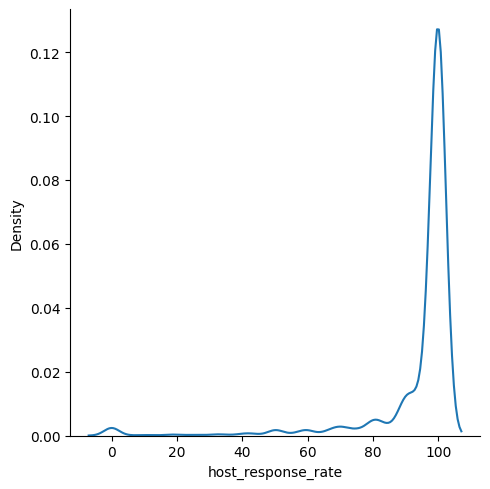

In [12]:
#distribution of host response rate
sns.displot(data=full_df, x='host_response_rate', kind="kde")
plt.show()

In [13]:
#top 25 host neighborhood
full_df.host_neighbourhood.value_counts().head(25)

Bedford-Stuyvesant    1102
Williamsburg           785
Jamaica                633
Bushwick               629
Flushing               566
Cambridge              553
Flatbush               516
Upper East Side        503
Crown Heights          489
Harlem                 487
Greenpoint             447
Elmhurst               385
Astoria                308
Hell's Kitchen         279
Long Island City       233
Park Slope             227
Upper West Side        212
East Harlem            202
Clinton Hill           202
East Flatbush          176
Ocean Hill             168
Hamilton Heights       168
East New York          161
Sunset Park            138
The Rockaways          134
Name: host_neighbourhood, dtype: int64

In [14]:
#top 25 host location
full_df.host_location.value_counts().head(25)

New York, NY                 11120
New York, United States       2496
United States                  244
Hawthorne, NJ                   89
Miami, FL                       79
Los Angeles, CA                 69
San Francisco, CA               60
Jersey City, NJ                 44
Yonkers, NY                     39
Philadelphia, PA                20
Mount Vernon, NY                19
Washington, DC                  19
Florida, United States          16
London, United Kingdom          16
California, United States       15
Atlanta, GA                     14
Chicago, IL                     13
Valley Stream, NY               13
Mineola, NY                     13
Orlando, FL                     12
Houston, TX                     12
Paris, France                   12
Bayonne, NJ                     12
Greenville, DE                  11
Wantagh, NY                     11
Name: host_location, dtype: int64

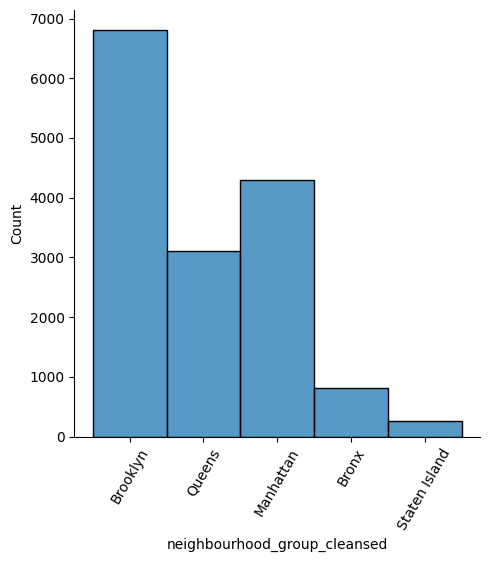

In [15]:
#distribution of listings based borough
sns.displot(data=full_df, x='neighbourhood_group_cleansed')
plt.xticks(rotation=60)
plt.show()

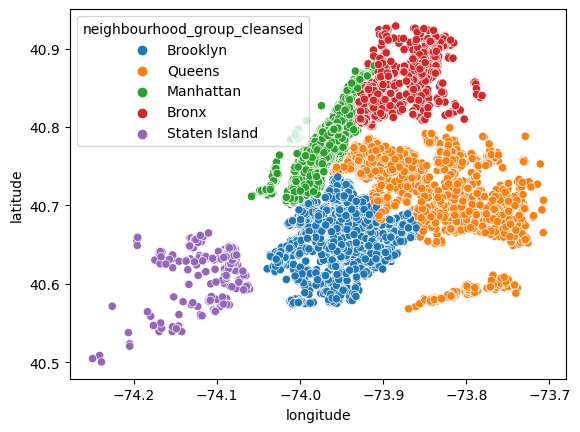

In [16]:
#scatter plot of listings 
sns.scatterplot(data=full_df, y='latitude', x='longitude', hue='neighbourhood_group_cleansed')
plt.show()

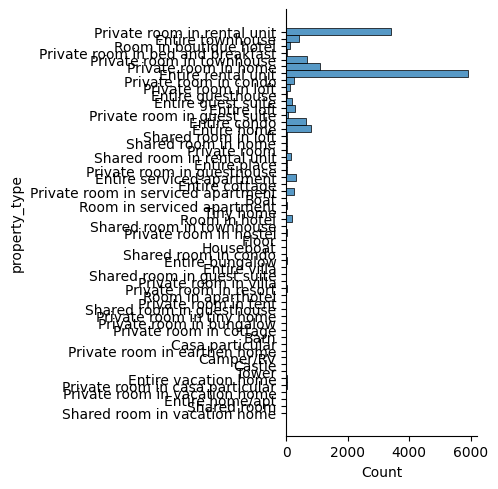

In [17]:
# distribution of property_type
sns.displot(data=full_df, y='property_type')
plt.show()

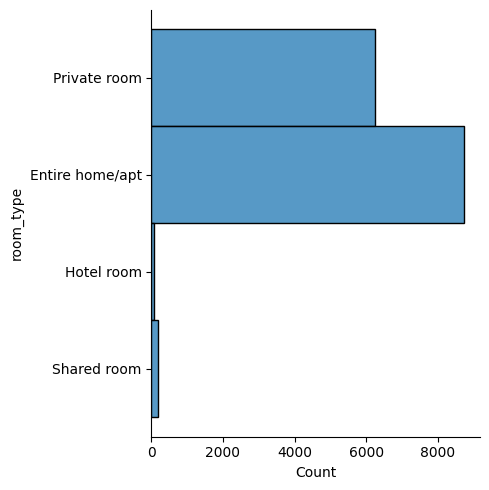

In [18]:
# distribution of room_type
sns.displot(data=full_df, y='room_type')
plt.show()

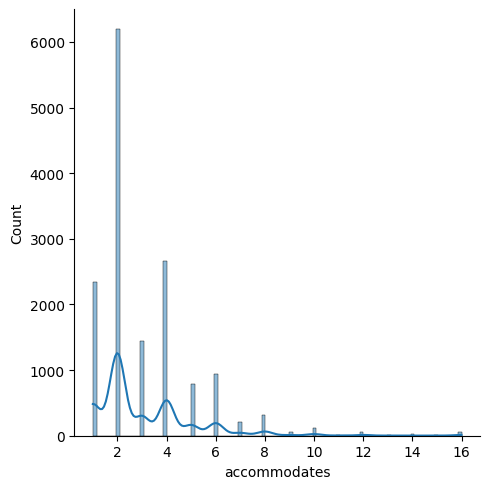

In [19]:
#distribution of accommodates
sns.displot(data=full_df, x='accommodates', kde=True)
plt.show()

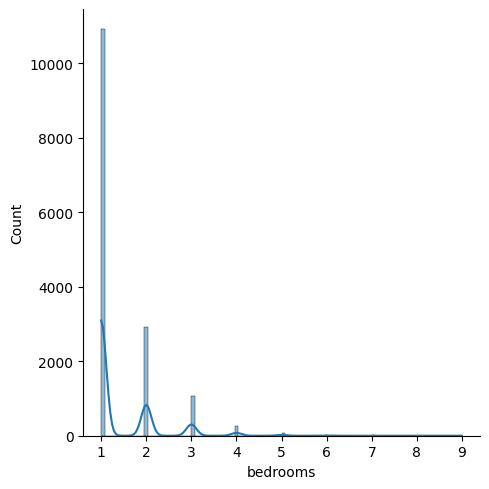

In [20]:
#distribution of bedrooms
sns.displot(data=full_df, x='bedrooms', kde=True)
plt.show()

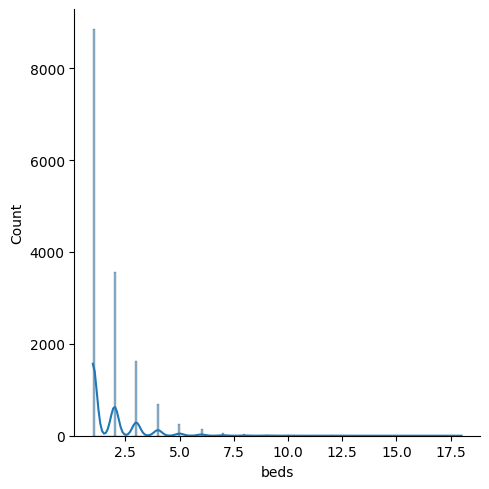

In [21]:
#distribution of beds
sns.displot(data=full_df, x='beds', kde=True)
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


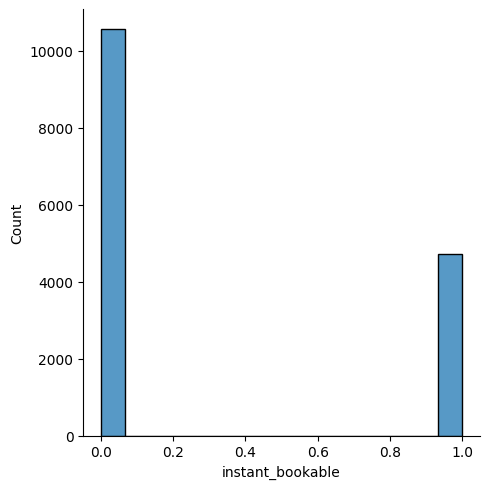

In [22]:
#distribution of instant_bookable
sns.displot(data=full_df, x='instant_bookable')
plt.show()

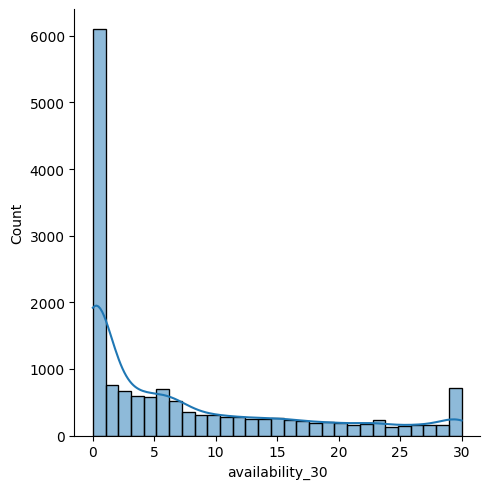

In [23]:
#distribution of availability_30
sns.displot(data=full_df, x='availability_30', kde=True)
plt.show()

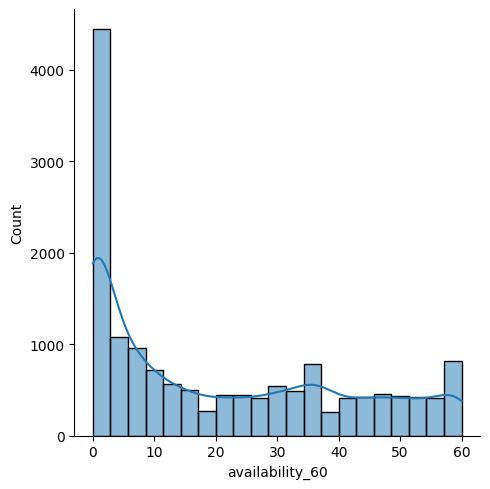

In [24]:
#distribution of availability_60
sns.displot(data=full_df, x='availability_60', kde=True)
plt.show()

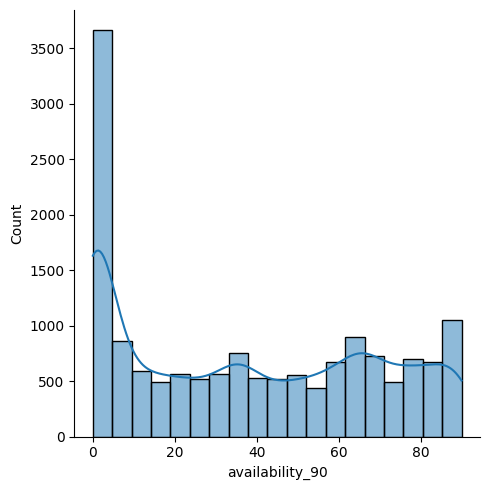

In [25]:
#distribution of availability_90
sns.displot(data=full_df, x='availability_90', kde=True)
plt.show()

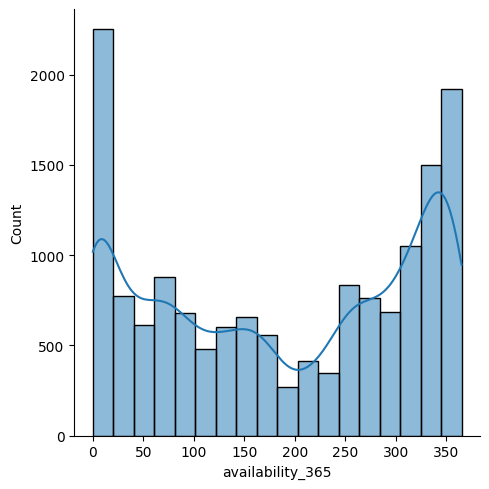

In [26]:
#distribution of availability_365
sns.displot(data=full_df, x='availability_365', kde=True)
plt.show()

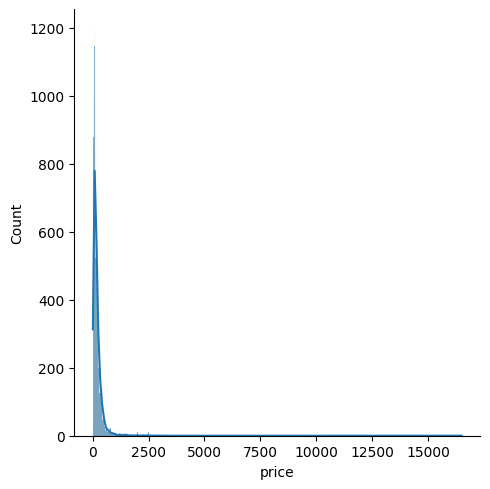

In [27]:
#distribution of price
sns.displot(data=full_df, x='price', kde=True)
plt.show()

# Feature Engineering

In [28]:
model_df = full_df.copy()
model_df.head()

,host_location,host_response_time,host_response_rate,host_neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,instant_bookable,price
0,"New York, NY",within an hour,100.0,Gravesend,Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,1.0,1.0,21,51,81,356,False,299.0
1,"New York, NY",within an hour,100.0,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,1.0,5,30,60,335,False,60.0
2,"New York, NY",within an hour,100.0,Ridgewood,Ridgewood,Queens,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,5.0,10.0,30,60,90,365,False,425.0
3,"New York, United States",within an hour,99.0,Greenpoint,Greenpoint,Brooklyn,40.73777,-73.95366,Room in boutique hotel,Hotel room,2,1.0,1.0,15,42,72,217,False,308.0
4,"New York, NY",within a few hours,100.0,Hell's Kitchen,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,1.0,1.0,2,4,7,160,False,68.0


In [29]:
#feature engineering from existing columns
model_df = pd.get_dummies(model_df, columns=['instant_bookable'], drop_first=True)
model_df = pd.get_dummies(model_df, columns=['room_type','property_type'], drop_first=True)
model_df = pd.get_dummies(model_df, columns=['neighbourhood_cleansed','neighbourhood_group_cleansed'], drop_first=True)
model_df = pd.get_dummies(model_df, columns=['host_response_time','host_neighbourhood'], drop_first=True)

#feature engineering from created columns
model_df['host_location_in_ny'] = np.where(model_df['host_location'].str.contains("NY|New York"), True, False)
model_df.drop("host_location", axis=1, inplace=True)
model_df = pd.get_dummies(model_df, columns=['host_location_in_ny'], drop_first=True)
model_df.head()

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,...,host_neighbourhood_Woodrow,host_neighbourhood_Woodside,host_neighbourhood_Woodstock,host_neighbourhood_Wynwood,host_neighbourhood_Yehuda Hamaccabi,host_neighbourhood_Yorkville,host_neighbourhood_Zephyr Cove,host_neighbourhood_Zona Romántica,host_neighbourhood_Zona Sin Asignación de Nombre de Colonia 1,host_location_in_ny_True
0,100.0,40.64529,-73.97238,2,1.0,1.0,21,51,81,356,...,0,0,0,0,0,0,0,0,0,1
1,100.0,40.68535,-73.95512,2,1.0,1.0,5,30,60,335,...,0,0,0,0,0,0,0,0,0,1
2,100.0,40.70309,-73.89963,16,5.0,10.0,30,60,90,365,...,0,0,0,0,0,0,0,0,0,1
3,99.0,40.73777,-73.95366,2,1.0,1.0,15,42,72,217,...,0,0,0,0,0,0,0,0,0,1
4,100.0,40.76457,-73.98317,2,1.0,1.0,2,4,7,160,...,0,0,0,0,0,0,0,0,0,1


# Creating Machine Learning Model

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
X = model_df.drop("price", axis=1).values #features
y = model_df["price"].values #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [32]:
# testing Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

print("Train score: ")
print(reg.score(X_train,y_train))
print("Testing score: ")
print(reg.score(X_test,y_test))

Train score: 
0.3725147284018979
Testing score: 
-995187806320.0363


In [33]:
#metrics for first model
MSE1 = mean_squared_error(y_test, reg.predict(X_test))
MAE1 = mean_absolute_error(y_test, reg.predict(X_test))

(MSE1, MAE1)

(1.321373798151502e+17, 15957352.008992758)

In [34]:
#metrics for first model across entire dataset
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X, y, cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: -586002694151448.1


neg_mean_squared_error mean cross validate score: -3.0024456700963082e+19


neg_root_mean_squared_error mean cross validate score: -3076202397.0586867


neg_mean_absolute_error mean cross validate score: -124700332.7170243




In [35]:
# finding important important features
features = model_df.drop("price", axis=1).columns
lasso = Lasso(alpha=0.3)
lasso.fit(X,y)

lasso_coef_df = pd.DataFrame({'feature': features , 'coef': lasso.coef_})

#top 30 most import features
lasso_coef_df[lasso_coef_df['coef'] > 0].sort_values('coef', ascending=False).reset_index(drop=True).head(10)

,feature,coef
0,host_neighbourhood_Downtown Vancouver,4371.565543
1,host_neighbourhood_Foxhurst,798.202301
2,host_neighbourhood_Clearwater Beach,417.088287
3,property_type_Room in boutique hotel,207.327760
4,neighbourhood_cleansed_SoHo,179.251888
5,property_type_Room in hotel,164.885482
6,neighbourhood_group_cleansed_Manhattan,163.956854
7,host_neighbourhood_Cambridge,160.878434
8,host_neighbourhood_Boerum Hill,87.463964
9,host_neighbourhood_Long Island City,83.382441


In [36]:
# finding less important features
threshold = 0.05
not_important_features = lasso_coef_df[(lasso_coef_df['coef'] > -threshold) & (lasso_coef_df['coef'] < threshold)]['feature'].values

#number of important features based on threshold var
len(model_df.columns) - len(list(not_important_features))

82

In [37]:
#creating a new df to reference the new features
new_model_df = model_df.drop(not_important_features, axis=1)
new_model_df["price"] = model_df['price']

new_model_df

,host_response_rate,longitude,accommodates,bedrooms,beds,availability_30,availability_60,availability_90,price,instant_bookable_True,...,host_neighbourhood_Long Island City,host_neighbourhood_Midtown,host_neighbourhood_Midtown East,host_neighbourhood_Murray Hill,host_neighbourhood_Park Slope,host_neighbourhood_Upper East Side,host_neighbourhood_Upper West Side,host_neighbourhood_Washington Heights,host_neighbourhood_Williamsburg,host_location_in_ny_True
0,100.0,-73.97238,2,1.0,1.0,21,51,81,299.0,0,...,0,0,0,0,0,0,0,0,0,1
1,100.0,-73.95512,2,1.0,1.0,5,30,60,60.0,0,...,0,0,0,0,0,0,0,0,0,1
2,100.0,-73.89963,16,5.0,10.0,30,60,90,425.0,0,...,0,0,0,0,0,0,0,0,0,1
3,99.0,-73.95366,2,1.0,1.0,15,42,72,308.0,0,...,0,0,0,0,0,0,0,0,0,1
4,100.0,-73.98317,2,1.0,1.0,2,4,7,68.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15262,100.0,-73.97136,3,2.0,2.0,0,0,2,490.0,1,...,0,0,0,0,0,0,0,0,0,1
15263,82.0,-74.00601,8,3.0,4.0,30,60,65,171.0,0,...,0,0,0,0,0,0,0,0,1,1
15264,100.0,-74.02778,3,1.0,2.0,0,0,0,325.0,1,...,0,0,0,0,0,0,0,0,0,0
15265,100.0,-73.82985,2,1.0,1.0,0,0,0,157.0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
#testing with reduced features
X2 = new_model_df.values #features
y2 = new_model_df["price"].values #target

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

reg2 = LinearRegression()
reg2.fit(X_train2, y_train2)

print("Train score: ")
print(reg2.score(X_train2,y_train2))
print("Testing score: ")
print(reg2.score(X_test2,y_test2))

Train score: 
1.0
Testing score: 
1.0


In [39]:
#metrics for second model
MSE2 = mean_squared_error(y_test2, reg2.predict(X_test2))
MAE2 = mean_absolute_error(y_test2, reg2.predict(X_test2))

In [40]:
#mean_squared_error (betterScore, difference)
(MSE2 < MSE1, MSE1 - MSE2)

(True, 1.321373798151502e+17)

In [41]:
#mean_absolute_error, (betterScore, difference)
(MAE2 < MAE1, MAE1 - MAE2)

(True, 15957352.008992758)

In [42]:
#metrics for second model across entire dataset
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X2, y2,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: 1.0


neg_mean_squared_error mean cross validate score: -5.230078607838031e-25


neg_root_mean_squared_error mean cross validate score: -6.225609582422194e-13


neg_mean_absolute_error mean cross validate score: -2.6380551402422654e-13




# KNN

In [43]:
from sklearn.neighbors import KNeighborsRegressor

X = model_df.drop("price", axis=1).values #features
y = model_df["price"].values #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)

print("Train score: ")
print(neigh.score(X_train,y_train))
print("Testing score: ")
print(neigh.score(X_test,y_test))

Train score: 
0.5586466928801157
Testing score: 
0.21128020816391102


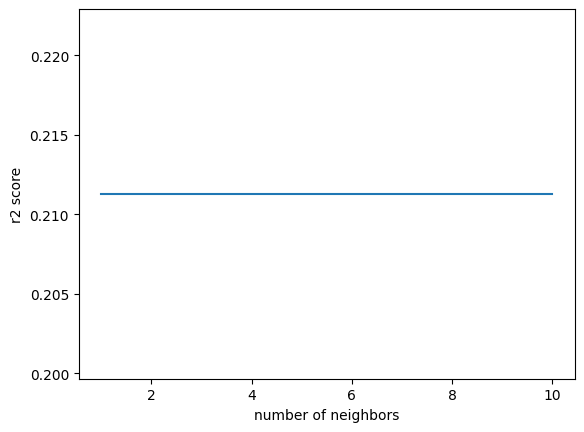

In [44]:
ns = np.arange(1,11)
test_score = []
for n in ns:
    knn = KNeighborsRegressor(n_neighbors=n)
    neigh.fit(X_train, y_train)
    test_score.append(neigh.score(X_test,y_test))

plt.plot(ns, test_score)
plt.xlabel('number of neighbors')
plt.ylabel('r2 score')
plt.show()

In [45]:
#metrics for first model across entire dataset
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, y, cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: 0.06685877315929407


neg_mean_squared_error mean cross validate score: -91907.90098860321


neg_root_mean_squared_error mean cross validate score: -300.52335863223595


neg_mean_absolute_error mean cross validate score: -104.79452869780069




In [46]:
#metrics for second model across entire dataset
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X2, y2,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: 0.976054450393972


neg_mean_squared_error mean cross validate score: -3245.4134506137752


neg_root_mean_squared_error mean cross validate score: -39.604165675409256


neg_mean_absolute_error mean cross validate score: -2.1138946429423062




# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor
X = model_df.drop("price", axis=1).values #features
y = model_df["price"].values #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42, )
regressor.fit(X_train, y_train)

print("Train score: ")
print(regressor.score(X_train,y_train))
print("Testing score: ")
print(regressor.score(X_test,y_test))

Train score: 
0.9999412665709273
Testing score: 
0.12050048311077699


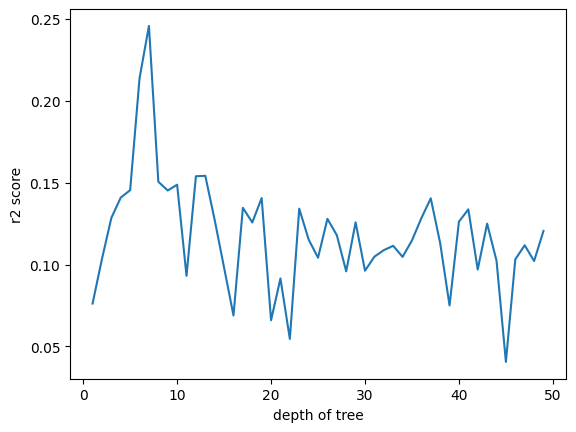

In [48]:
ns = np.arange(1,50)
test_score = []
for n in ns:
    regressor = DecisionTreeRegressor(random_state=42, max_depth=n)
    regressor.fit(X_train, y_train)
    test_score.append(regressor.score(X_test,y_test))

plt.plot(ns, test_score)
plt.xlabel('depth of tree')
plt.ylabel('r2 score')
plt.show()

In [49]:
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor(random_state=42, max_depth=8)
cv_scores = cross_validate(dt, X, y, cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: 0.15541361233640608


neg_mean_squared_error mean cross validate score: -88443.62236235249


neg_root_mean_squared_error mean cross validate score: -291.9744746226645


neg_mean_absolute_error mean cross validate score: -84.1535666030637




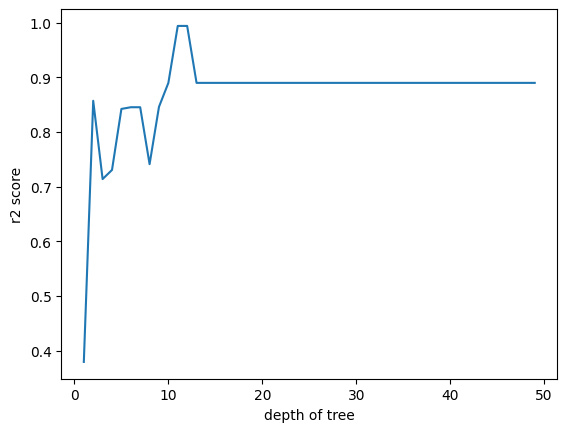

In [50]:
ns = np.arange(1,50)
test_score = []
for n in ns:
    regressor = DecisionTreeRegressor(random_state=42, max_depth=n)
    regressor.fit(X_train2, y_train2)
    test_score.append(regressor.score(X_test2,y_test2))

plt.plot(ns, test_score)
plt.xlabel('depth of tree')
plt.ylabel('r2 score')
plt.show()

In [51]:
#metrics for second model across entire dataset
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor(random_state=42, max_depth=11)
cv_scores = cross_validate(dt, X2, y2,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: 0.9683552744660757


neg_mean_squared_error mean cross validate score: -4391.310718948046


neg_root_mean_squared_error mean cross validate score: -42.60259717789499


neg_mean_absolute_error mean cross validate score: -1.0834109672313914




# Testing bathrooms_text with Linear Regression

In [52]:
important_columns = [
    'id',
    # 'last_scraped',
    # 'name',
    # 'description',
    'host_location',
    'host_response_time',
    'host_response_rate',
    'host_neighbourhood',
    'neighbourhood_cleansed',
    'neighbourhood_group_cleansed',
    'latitude',
    'longitude',
    'property_type',
    'room_type',
    'accommodates',
    'bathrooms_text',
    'bedrooms',
    'beds',
    # 'amenities',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'instant_bookable',
    'price'
    ]
df_with_bathrooms = data[important_columns]

df_with_bathrooms['host_response_rate'] = pd.to_numeric(df_with_bathrooms['host_response_rate'].str.replace("%",''))
df_with_bathrooms['instant_bookable'] = np.where(df_with_bathrooms['instant_bookable'] == 't', True, False)
df_with_bathrooms['price'] = df_with_bathrooms['price'].str.replace("$","")
df_with_bathrooms['price'] = pd.to_numeric(df_with_bathrooms['price'].str.replace(",",""))

df_with_bathrooms.shape

/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_2413/2393967312.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_bathrooms['host_response_rate'] = pd.to_numeric(df_with_bathrooms['host_response_rate'].str.replace("%",''))
/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_2413/2393967312.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_bathrooms['instant_bookable'] = np.where(df_with_bathrooms['instant_bookable'] == 't', True, False)
/var/folders/sj/tbs4vnjn7h7f5_2

(39881, 21)

In [53]:
df_with_bathrooms = df_with_bathrooms.dropna(subset=['bathrooms_text'])
df_with_bathrooms = df_with_bathrooms.dropna().drop_duplicates().drop('id', axis=1).reset_index(drop=True)

df_with_bathrooms.shape

(15258, 20)

In [54]:
#helper functions
def getSharedStatus(data):
    return ('shared' in data or 'Shared' in data)

def getHalfBathStatus(data):
    return ('half-bath' in data)

def getPrivateStatus(data):
    return ('Private' in data)

def getNumberofBathrooms(data):
    splits = data.split(" ")[0]
    num = splits[0]
    try:
        num = int(num)
        return num
    except:
        return 1

df_with_bathrooms['bathroomShared'] = df_with_bathrooms['bathrooms_text'].apply(getSharedStatus)
df_with_bathrooms['isBathroomHalf'] = df_with_bathrooms['bathrooms_text'].apply(getHalfBathStatus)
df_with_bathrooms['isBathroomPrivate'] = df_with_bathrooms['bathrooms_text'].apply(getPrivateStatus)
df_with_bathrooms['numberOfBathrooms'] = df_with_bathrooms['bathrooms_text'].apply(getNumberofBathrooms)
df_with_bathrooms.drop('bathrooms_text', axis=1, inplace=True)

In [55]:
#feature engineering from existing columns
df_with_bathrooms = pd.get_dummies(df_with_bathrooms, columns=['instant_bookable'], drop_first=True)
df_with_bathrooms = pd.get_dummies(df_with_bathrooms, columns=['room_type','property_type'], drop_first=True)
df_with_bathrooms = pd.get_dummies(df_with_bathrooms, columns=['neighbourhood_cleansed','neighbourhood_group_cleansed'], drop_first=True)
df_with_bathrooms = pd.get_dummies(df_with_bathrooms, columns=['host_response_time','host_neighbourhood'], drop_first=True)

#feature engineering from created columns
df_with_bathrooms['host_location_in_ny'] = np.where(df_with_bathrooms['host_location'].str.contains("NY|New York"), True, False)
df_with_bathrooms.drop("host_location", axis=1, inplace=True)
df_with_bathrooms = pd.get_dummies(df_with_bathrooms, columns=['host_location_in_ny'], drop_first=True)

In [56]:
X = df_with_bathrooms.drop('price', axis=1).values #features
y = df_with_bathrooms["price"].values #target

In [57]:
#metrics for best model across entire dataset with bathroom features included
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
bath_reg = LinearRegression()
cv_scores = cross_validate(bath_reg, X, y,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: -2263899529783396.0


neg_mean_squared_error mean cross validate score: -1.649296124056613e+20


neg_root_mean_squared_error mean cross validate score: -10810990358.006086


neg_mean_absolute_error mean cross validate score: -360924979.0281764




In [58]:
features = df_with_bathrooms.drop("price", axis=1).columns
lasso = Lasso(alpha=0.3)
lasso.fit(X,y)

lasso_coef_df = pd.DataFrame({'feature': features , 'coef': lasso.coef_})

In [59]:
bathroom_features = ['bathroomShared', 'isBathroomHalf', 'isBathroomPrivate','numberOfBathrooms']
for feature in bathroom_features:
    display(lasso_coef_df[lasso_coef_df['feature'] == feature].reset_index(drop=True))

,feature,coef
0,bathroomShared,-19.920025


,feature,coef
0,isBathroomHalf,-0.0


,feature,coef
0,isBathroomPrivate,-0.0


,feature,coef
0,numberOfBathrooms,139.552368


In [60]:
# finding less important features
threshold = 0.05
not_important_features = lasso_coef_df[(lasso_coef_df['coef'] > -threshold) & (lasso_coef_df['coef'] < threshold)]['feature'].values

#number of important features based on threshold var
len(df_with_bathrooms.columns) - len(list(not_important_features))

88

In [61]:
#creating a new df to reference the new features
new_df_with_bathrooms = df_with_bathrooms.drop(not_important_features, axis=1)
new_df_with_bathrooms["price"] = model_df['price']

In [62]:
#testing with reduced features
X2 = new_df_with_bathrooms.drop('price',axis=1).values #features
y2 = new_df_with_bathrooms["price"].values #target

In [63]:
#metrics for best model across entire dataset with bathroom features included
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
bath_reg = LinearRegression()
cv_scores = cross_validate(bath_reg, X2, y2,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: -0.005970740289175968


neg_mean_squared_error mean cross validate score: -103860.99288621914


neg_root_mean_squared_error mean cross validate score: -321.08272902436784


neg_mean_absolute_error mean cross validate score: -135.72081456587003




# Bathroom Conclusions
- numberOfBathrooms is more important than other bathroom type features
- is bathroom a half bath and is bathroom private features aren't important
- numberOfBathrooms and bathroomShared features don't have much impact on model

# Testing amenities

In [64]:
important_columns = [
    'id',
    # 'last_scraped',
    # 'name',
    # 'description',
    'host_location',
    'host_response_time',
    'host_response_rate',
    'host_neighbourhood',
    'neighbourhood_cleansed',
    'neighbourhood_group_cleansed',
    'latitude',
    'longitude',
    'property_type',
    'room_type',
    'accommodates',
    # 'bathrooms_text',
    'bedrooms',
    'beds',
    'amenities',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'instant_bookable',
    'price'
    ]
df_with_amenities = data[important_columns]

df_with_amenities['host_response_rate'] = pd.to_numeric(df_with_amenities['host_response_rate'].str.replace("%",''))
df_with_amenities['instant_bookable'] = np.where(df_with_amenities['instant_bookable'] == 't', True, False)
df_with_amenities['price'] = df_with_amenities['price'].str.replace("$","")
df_with_amenities['price'] = pd.to_numeric(df_with_amenities['price'].str.replace(",",""))
df_with_amenities = df_with_amenities.dropna().drop_duplicates().drop('id', axis=1).reset_index(drop=True)

/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_2413/1524985953.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_amenities['host_response_rate'] = pd.to_numeric(df_with_amenities['host_response_rate'].str.replace("%",''))
/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_2413/1524985953.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_amenities['instant_bookable'] = np.where(df_with_amenities['instant_bookable'] == 't', True, False)
/var/folders/sj/tbs4vnjn7h7f5_2

In [65]:
#feature engineering from existing columns
df_with_amenities = pd.get_dummies(df_with_amenities, columns=['instant_bookable'], drop_first=True)
df_with_amenities = pd.get_dummies(df_with_amenities, columns=['room_type','property_type'], drop_first=True)
df_with_amenities = pd.get_dummies(df_with_amenities, columns=['neighbourhood_cleansed','neighbourhood_group_cleansed'], drop_first=True)
df_with_amenities = pd.get_dummies(df_with_amenities, columns=['host_response_time','host_neighbourhood'], drop_first=True)

#feature engineering from created columns
df_with_amenities['host_location_in_ny'] = np.where(df_with_amenities['host_location'].str.contains("NY|New York"), True, False)
df_with_amenities.drop("host_location", axis=1, inplace=True)
df_with_amenities = pd.get_dummies(df_with_amenities, columns=['host_location_in_ny'], drop_first=True)

In [66]:
amenities = {}
for amenities_set in df_with_amenities.amenities.values:
    amenities_set = amenities_set.strip('][').replace('"',"").split(', ')
    for item in amenities_set:
        amenities[item] = amenities.get(item, 0) + 1
        
#number of unique amenities
len(amenities.keys())

3359

In [67]:
from sklearn.preprocessing import MultiLabelBinarizer

list_function = lambda row: row.strip('][').replace('"',"").split(', ')
df_with_amenities['amenities'] = df_with_amenities.amenities.apply(list_function)
mlb = MultiLabelBinarizer()

amenities_df = pd.DataFrame(mlb.fit_transform(df_with_amenities['amenities']),columns=mlb.classes_, index=df_with_amenities.index)

amenities_df.head()

,,Bath & Body Works body soap,Bath & Body Works conditioner,Bath & Body Works shampoo,Bath & Body Works. body soap,Bath & Body Works. conditioner,Bath & Body Works. shampoo,Bertazzoni stainless steel oven,Bose Speaker Bluetooth sound system,Eco Botanics body soap,...,undercounter refrigerator,variants of body\u2019s washes body soap,walk-in closet,wardrobe,we have a Ninja air fryer oven,wifi connect sound system,with full size oven and broiler underneath. stainless steel oven,women and children. A packaged bar of soap is provided in each bathroom and liquid soap. I also offer a variety of bubble bath. Bath & Body shop products. Meyers hand soap. body soap,works great. Gas powered. oven,you should be satisfied. stainless steel oven
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df_with_amenities = df_with_amenities.join(amenities_df)
df_with_amenities.drop(['amenities'], axis=1, inplace=True)
df_with_amenities.head()

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,...,undercounter refrigerator,variants of body\u2019s washes body soap,walk-in closet,wardrobe,we have a Ninja air fryer oven,wifi connect sound system,with full size oven and broiler underneath. stainless steel oven,women and children. A packaged bar of soap is provided in each bathroom and liquid soap. I also offer a variety of bubble bath. Bath & Body shop products. Meyers hand soap. body soap,works great. Gas powered. oven,you should be satisfied. stainless steel oven
0,100.0,40.64529,-73.97238,2,1.0,1.0,21,51,81,356,...,0,0,0,0,0,0,0,0,0,0
1,100.0,40.68535,-73.95512,2,1.0,1.0,5,30,60,335,...,0,0,0,0,0,0,0,0,0,0
2,100.0,40.70309,-73.89963,16,5.0,10.0,30,60,90,365,...,0,0,0,0,0,0,0,0,0,0
3,99.0,40.73777,-73.95366,2,1.0,1.0,15,42,72,217,...,0,0,0,0,0,0,0,0,0,0
4,100.0,40.76457,-73.98317,2,1.0,1.0,2,4,7,160,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X = df_with_amenities.drop('price', axis=1).values #features
y = df_with_amenities["price"].values #target

In [70]:
#metrics for best model across entire dataset with amenities features included
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
am_reg = LinearRegression()
cv_scores = cross_validate(am_reg, X, y,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: -9.002029804337994e+17


neg_mean_squared_error mean cross validate score: -1.1925064369015085e+23


neg_root_mean_squared_error mean cross validate score: -168410204435.32288


neg_mean_absolute_error mean cross validate score: -16943717715.337229




In [71]:
features = df_with_amenities.drop("price", axis=1).columns
lasso = Lasso(alpha=0.3)
lasso.fit(X,y)

lasso_coef_df = pd.DataFrame({'feature': features , 'coef': lasso.coef_})

In [77]:
lasso_coef_df['coef_'] = lasso_coef_df.coef.apply(abs)
lasso_coef_df.sort_values('coef_', ascending=False)[['feature','coef_']].reset_index(drop=True).head(25)

,feature,coef_
0,Facial rice soap and Sandal Wood Soap. body soap,10807.219643
1,host_neighbourhood_Downtown Vancouver,4353.432915
2,host_neighbourhood_Foxhurst,692.267142
3,32\ TV,488.563504
4,host_neighbourhood_Clearwater Beach,338.936860
5,Various conditioner,269.808093
6,neighbourhood_cleansed_SoHo,182.797409
7,neighbourhood_group_cleansed_Manhattan,145.200885
8,longitude,117.541454
9,property_type_Room in hotel,114.952842


In [73]:
# finding less important features
threshold = 0.05
not_important_features = lasso_coef_df[(lasso_coef_df['coef'] > -threshold) & (lasso_coef_df['coef'] < threshold)]['feature'].values

#number of important features based on threshold var
len(df_with_amenities.columns) - len(list(not_important_features))

168

In [74]:
#creating a new df to reference the new features
new_df_with_amenities = df_with_amenities.drop(not_important_features, axis=1)
new_df_with_amenities["price"] = model_df['price']

In [75]:
#testing with reduced features
X2 = new_df_with_amenities.drop('price',axis=1).values #features
y2 = new_df_with_amenities["price"].values #target

In [76]:
#metrics for best model across entire dataset with amenities features included
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
am_reg = LinearRegression()
cv_scores = cross_validate(am_reg, X2, y2,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])}")
    print("\n")

r2 mean cross validate score: 0.3101467013414765


neg_mean_squared_error mean cross validate score: -73367.03703202725


neg_root_mean_squared_error mean cross validate score: -264.88184008959314


neg_mean_absolute_error mean cross validate score: -90.81413241938473


